In [1]:
import numpy as np
from scipy.interpolate import Rbf, interp2d

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:

plt.rcParams['figure.figsize'] = (8., 6.)
plt.rcParams['font.size'] = 16.

In [3]:
l1 = lambda x : 0.25*x + 10
l2 = lambda x : 0.25*x + 20
l3 = lambda x : 0.25*x + 30

In [4]:

n_pts = 10 # Points per layer
l1_pts_x = np.random.uniform(0,100,n_pts)
l1_pts_y = l1(l1_pts_x)
l2_pts_x = np.random.uniform(0,100,n_pts)
l2_pts_y = l2(l2_pts_x)
l3_pts_x = np.random.uniform(0,100,n_pts)
l3_pts_y = l3(l3_pts_x)

(-4.95, 103.95, 7.762499999999999, 56.9875)

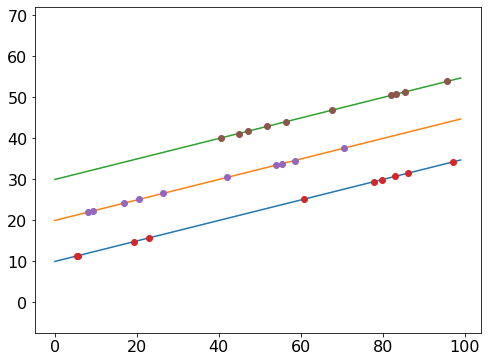

In [5]:
xvals = np.arange(100)

plt.plot(xvals, l1(xvals))
plt.plot(xvals, l2(xvals))
plt.plot(xvals, l3(xvals))

plt.plot(l1_pts_x, l1_pts_y, 'o')
plt.plot(l2_pts_x, l2_pts_y, 'o')
plt.plot(l3_pts_x, l3_pts_y, 'o')

plt.axis('equal')

In [6]:
# set up grid
ti = np.linspace(0, 100, 100)
XI, YI = np.meshgrid(ti, ti)

# combine data in arrays
x = np.hstack([l1_pts_x, l2_pts_x, l3_pts_x])
y = np.hstack([l1_pts_y, l2_pts_y, l3_pts_y])

# give points values
z = np.hstack([np.ones(n_pts)*10, np.ones(n_pts)*20, np.ones(n_pts)*30])

f = interp2d(x, y, z, kind='cubic')
ZI = f(XI.flatten(), YI.flatten())# .reshape((100,100))

In [7]:
ZI = np.empty_like(XI)
for i in range(100):
    for j in range(100):
        ZI[i,j] = f(j,i)

In [9]:
z

array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 20., 20., 20.,
       20., 20., 20., 20., 20., 20., 20., 30., 30., 30., 30., 30., 30.,
       30., 30., 30., 30.])